In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

## model 1 (vanilla, no fine-tuning)

runtime = 0:57

In [2]:
df1 = pd.read_csv('data/pred1.csv', index_col=0)

In [3]:
print("Accuracy:", accuracy_score(df1['actual'],df1['0']))
print("Precision:", precision_score(df1['actual'],df1['0']))
print("Recall:", recall_score(df1['actual'],df1['0']))

Accuracy: 0.7267950963222417
Precision: 0.7710219922380336
Recall: 0.8153214774281806


## model 2 (vanilla w/ fine-tuning)

runtime = 6:02

In [4]:
df2 = pd.read_csv('data/pred2.csv', index_col=0)

In [5]:
print("Accuracy:", accuracy_score(df2['actual'],df2['0']))
print("Precision:", precision_score(df2['actual'],df2['0']))
print("Recall:", recall_score(df2['actual'],df2['0']))

Accuracy: 0.7390542907180385
Precision: 0.776500638569604
Recall: 0.8317373461012312


## model 3 (tBERT)

runtime = 8:56

In [6]:
df3 = pd.read_csv('data/pred3.csv', index_col=0)

In [8]:
print("Accuracy:", accuracy_score(df3['actual'],df3['0']))
print("Precision:", precision_score(df3['actual'],df3['0']))
print("Recall:", recall_score(df3['actual'],df3['0']))

Accuracy: 0.7644483362521891
Precision: 0.7924050632911392
Recall: 0.8563611491108071


## model 3 loss graphs

In [36]:
def smooth_avg(loss, inv=50):
    i=0
    j=inv
    avgs=[loss.at[0,'loss']]
    while j<len(loss):
        j = min(j+inv, len(loss))
        avgs.append(loss['loss'].iloc[i:j].mean())
    return avgs

In [37]:
loss1 = pd.read_csv("data/loss_adam.csv", names=['iter','loss'], header=0)
loss1_avg = pd.DataFrame(smooth_avg(loss1, inv=4)).reset_index()

In [38]:
loss2 = pd.read_csv("data/loss_adagrad.csv", names=['iter','loss'], header=0)
loss2_avg = pd.DataFrame(smooth_avg(loss2, inv=4)).reset_index()

In [39]:
loss3 = pd.read_csv("data/loss_sgd.csv", names=['iter','loss'], header=0)
loss3_avg = pd.DataFrame(smooth_avg(loss3, inv=4)).reset_index()

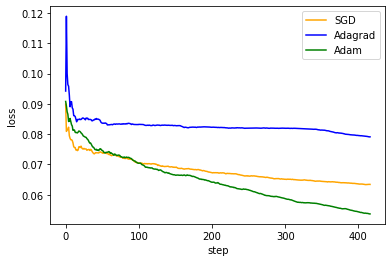

In [40]:
fig, ax = plt.subplots()
ax.plot(loss2_avg['index'],loss3_avg[0], color='orange', label="SGD")
ax.plot(loss2_avg['index'],loss2_avg[0], color='blue', label="Adagrad")
ax.plot(loss1_avg['index'],loss1_avg[0], color='green', label="Adam")
ax.legend()
plt.xlabel('step')
plt.ylabel('loss')
plt.show()